/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


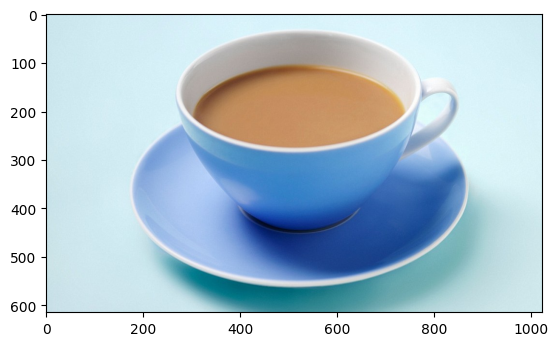

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import cv2

img= cv2.imread("/kaggle/input/pca-images/tea.jpg")
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [2]:
img.shape

(615, 1024, 3)

In [3]:
r,g,b= cv2.split(img)

In [4]:
channels= list()
r, g, b= r/255, g/255, b/255
channels.append(r)
channels.append(g)
channels.append(b)
names= ['Red', 'Green', 'Blue']

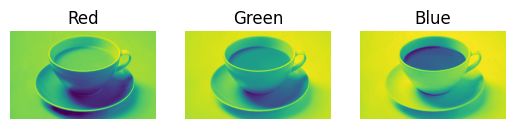

In [5]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(channels[i])
    plt.title(names[i])
    plt.axis("off")


In [6]:
pca_components= [1,2,5,10,25,50]

In [7]:
pca_r= PCA(n_components= pca_components[-1])
reduced_r= pca_r.fit_transform(r)
print("Original dimensions:", r.shape)
print("Transformed dimensions:", reduced_r.shape)

Original dimensions: (615, 1024)
Transformed dimensions: (615, 50)


In [8]:
pca_g= PCA(n_components= pca_components[-1])
reduced_g= pca_g.fit_transform(g)

pca_b= PCA(n_components= pca_components[-1])
reduced_b= pca_b.fit_transform(b)

In [9]:
reconstructed_r= pca_r.inverse_transform(reduced_r)
reconstructed_g= pca_g.inverse_transform(reduced_g)
reconstructed_b= pca_b.inverse_transform(reduced_b)

In [10]:
retained_image= (cv2.merge((reconstructed_r,reconstructed_g,reconstructed_b)))

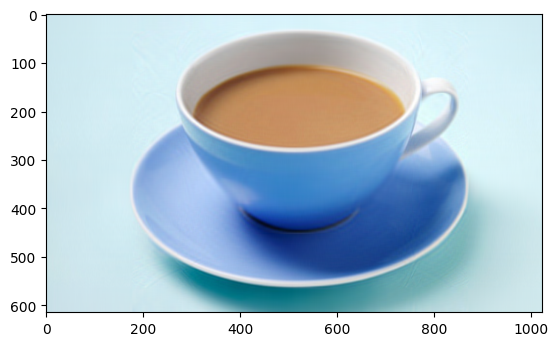

In [11]:
plt.imshow(retained_image)

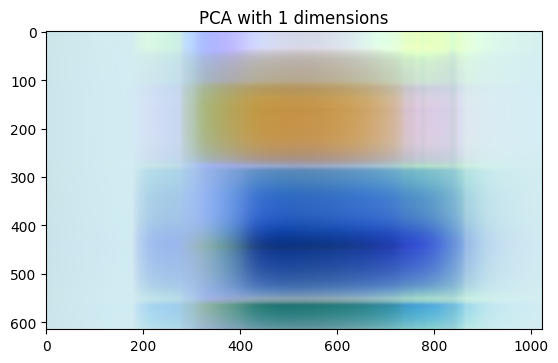

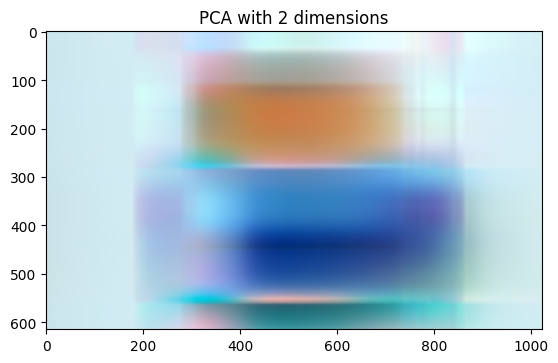

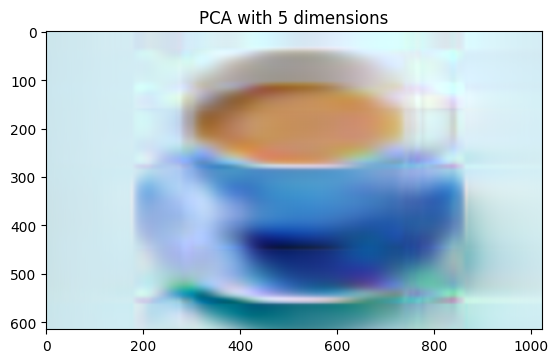

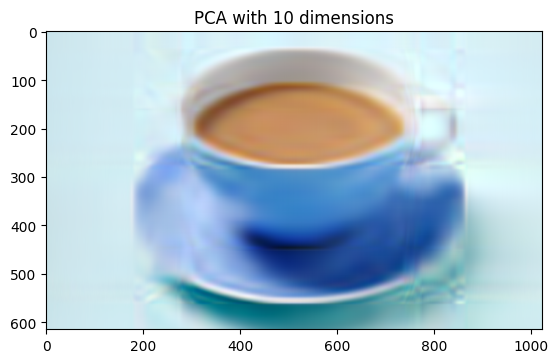

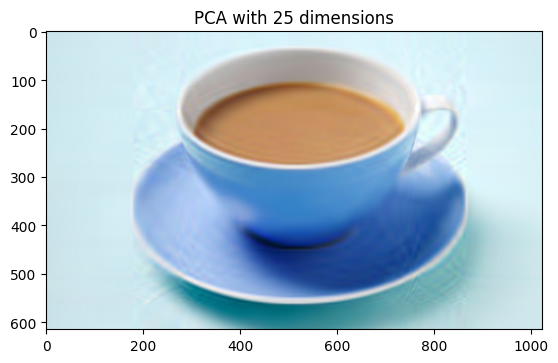

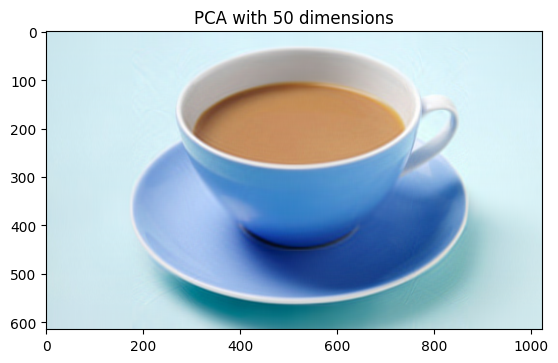

In [12]:
for i in pca_components:
    # Transformation
    pca_r= PCA(n_components= i)
    reduced_r= pca_r.fit_transform(r)
    pca_g= PCA(n_components= i)
    reduced_g= pca_g.fit_transform(g)
    pca_b= PCA(n_components= i)
    reduced_b= pca_b.fit_transform(b)
    
    # Retaining the dimensions
    reconstructed_r= pca_r.inverse_transform(reduced_r)
    reconstructed_g= pca_g.inverse_transform(reduced_g)
    reconstructed_b= pca_b.inverse_transform(reduced_b)
    
    retained_image= (cv2.merge((reconstructed_r,reconstructed_g,reconstructed_b)))
   
    plt.imshow(retained_image)
    plt.title("PCA with {} dimensions".format(i))
    plt.show()
    